In [3]:
!pip install tensorflow==2.15.0 tensorflow-hub keras==2.15.0

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras,os
import numpy as np
import tensorflow as tf

In [5]:
# Importing the Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input,Lambda,Dense,Flatten

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

from keras.applications.vgg16 import VGG16
#from keras.applications.vgg16 import VGG19

from glob import glob

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Re-Size the Image
Image_Size = [224,224]

train_path = "/content/drive/MyDrive/Data_100/traing"
valid_path = "/content/drive/MyDrive/Data_100/validation"

In [8]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape= Image_Size + [3], weights= "imagenet",include_top= False)

58889256/58889256 [==============================] - 4s 0us/step


In [9]:
# Don't train existing weights

for layer in vgg16.layers:
  layer.trainable = False

In [10]:
folders = glob("/content/drive/MyDrive/Data_100/traing/*")

In [11]:
folders

['/content/drive/MyDrive/Data_100/traing/Tomato__Tomato_mosaic_virus',
 '/content/drive/MyDrive/Data_100/traing/Tomato_Bacterial_spot',
 '/content/drive/MyDrive/Data_100/traing/Tomato_Early_blight',
 '/content/drive/MyDrive/Data_100/traing/Tomato_Late_blight',
 '/content/drive/MyDrive/Data_100/traing/Tomato_Spider_mites_Two_spotted_spider_mite',
 '/content/drive/MyDrive/Data_100/traing/Tomato_Septoria_leaf_spot',
 '/content/drive/MyDrive/Data_100/traing/Tomato_Leaf_Mold',
 '/content/drive/MyDrive/Data_100/traing/Tomato__Tomato_YellowLeaf__Curl_Virus',
 '/content/drive/MyDrive/Data_100/traing/Tomato_healthy',
 '/content/drive/MyDrive/Data_100/traing/Tomato__Target_Spot']

In [12]:
# Our Layers we can add more if we want

x = Flatten()(vgg16.output)

In [13]:
len(folders)

10

In [14]:
prediction = Dense(len(folders),activation = "softmax")(x)

# create a Model Object
model = Model(inputs = vgg16.input,outputs = prediction)

In [15]:
#View the structure of the Model

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

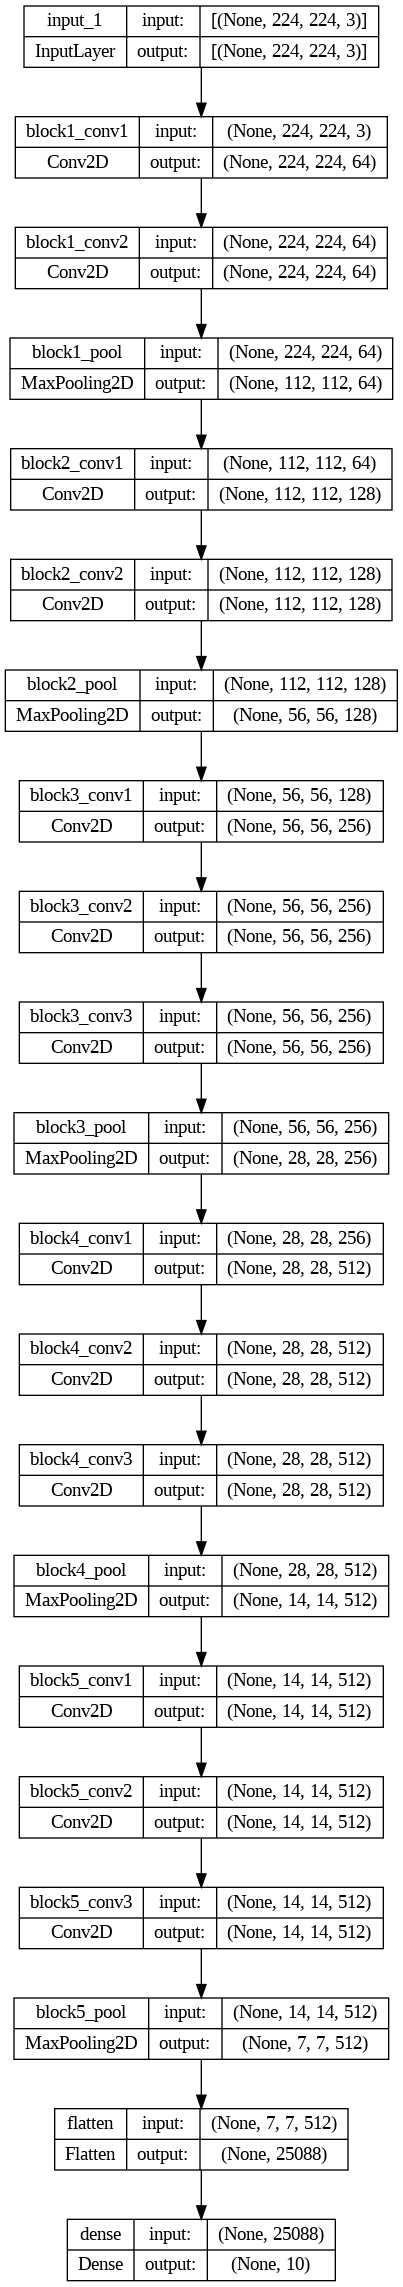

In [24]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [16]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
# Data Preprocesing

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [18]:
#Preprocess the Test size
test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 833 images belonging to 10 classes.


In [20]:

print(len(training_set))

27


In [21]:
#Reading Test DataSet
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = "categorical")

Found 107 images belonging to 10 classes.


In [23]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=100,

)

Epoch 1/100
27/27 [==============================] - 607s 22s/step - loss: 2.2276 - accuracy: 0.3397 - val_loss: 1.7188 - val_accuracy: 0.5421
Epoch 2/100
27/27 [==============================] - 14s 525ms/step - loss: 1.0171 - accuracy: 0.6963 - val_loss: 1.2983 - val_accuracy: 0.5888
Epoch 3/100
27/27 [==============================] - 14s 512ms/step - loss: 0.6967 - accuracy: 0.7743 - val_loss: 1.1014 - val_accuracy: 0.6542
Epoch 4/100
27/27 [==============================] - 14s 515ms/step - loss: 0.6684 - accuracy: 0.7815 - val_loss: 1.1974 - val_accuracy: 0.6449
Epoch 5/100
27/27 [==============================] - 14s 516ms/step - loss: 0.4296 - accuracy: 0.8703 - val_loss: 1.1015 - val_accuracy: 0.6168
Epoch 6/100
27/27 [==============================] - 14s 517ms/step - loss: 0.4433 - accuracy: 0.8607 - val_loss: 0.9142 - val_accuracy: 0.7103
Epoch 7/100
27/27 [==============================] - 14s 510ms/step - loss: 0.3130 - accuracy: 0.9208 - val_loss: 0.8426 - val_accuracy: 

In [25]:
from tensorflow.keras.models import load_model
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


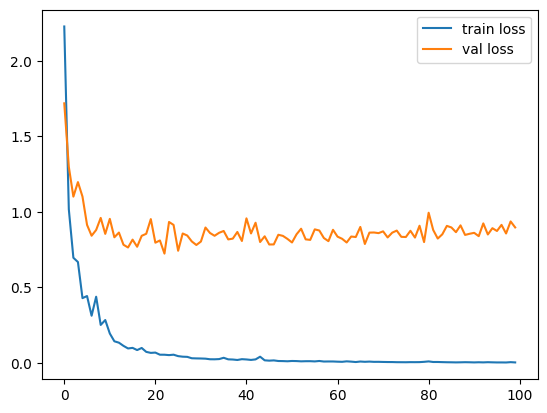

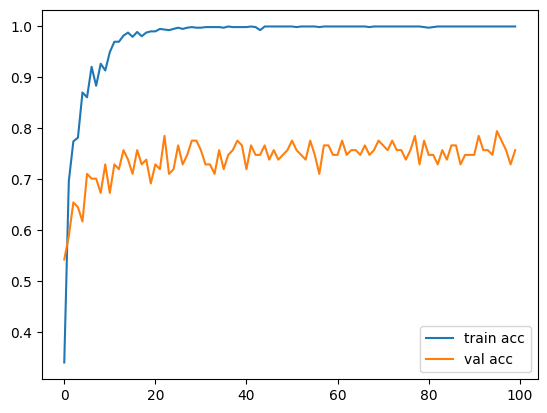

<Figure size 640x480 with 0 Axes>

In [26]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_vgg19')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc_vgg19')

In [29]:
r.history['loss'][:]

[2.227555274963379,
 1.0171313285827637,
 0.6967002153396606,
 0.6684039831161499,
 0.4295625686645508,
 0.44333556294441223,
 0.31297552585601807,
 0.4389025568962097,
 0.25206315517425537,
 0.2845170795917511,
 0.19535386562347412,
 0.14383451640605927,
 0.13455992937088013,
 0.11355142295360565,
 0.09641896933317184,
 0.10021068900823593,
 0.08573055267333984,
 0.09960272908210754,
 0.07376645505428314,
 0.06707025319337845,
 0.06903409957885742,
 0.05505475401878357,
 0.0548865981400013,
 0.05230371281504631,
 0.055103205144405365,
 0.04556909576058388,
 0.041889771819114685,
 0.04075375571846962,
 0.031498562544584274,
 0.030534302815794945,
 0.02994067408144474,
 0.028821084648370743,
 0.024896468967199326,
 0.024600030854344368,
 0.026029929518699646,
 0.03462088480591774,
 0.024284586310386658,
 0.023145904764533043,
 0.020122511312365532,
 0.025396643206477165,
 0.023540599271655083,
 0.020466193556785583,
 0.02398756518959999,
 0.04183496534824371,
 0.017812861129641533,
 0.0

In [30]:
r.history['val_loss'][:]

[1.7188239097595215,
 1.2983027696609497,
 1.101367473602295,
 1.1973892450332642,
 1.1015362739562988,
 0.9142341017723083,
 0.8425878286361694,
 0.8806685209274292,
 0.9604606032371521,
 0.8548279404640198,
 0.9541120529174805,
 0.8321610689163208,
 0.8634739518165588,
 0.7828342914581299,
 0.7647303938865662,
 0.8167240023612976,
 0.7695631980895996,
 0.8419046401977539,
 0.8554549813270569,
 0.9525516033172607,
 0.7964087724685669,
 0.8112285733222961,
 0.7242050766944885,
 0.9335277676582336,
 0.9140404462814331,
 0.7430086135864258,
 0.8573413491249084,
 0.8438836336135864,
 0.8047119379043579,
 0.7812089920043945,
 0.8040665984153748,
 0.8968672156333923,
 0.8605976700782776,
 0.842119574546814,
 0.8620222806930542,
 0.8739961981773376,
 0.8181937336921692,
 0.8233253359794617,
 0.8675074577331543,
 0.8077203035354614,
 0.9574987292289734,
 0.8576726913452148,
 0.9285035133361816,
 0.8008782863616943,
 0.8386576175689697,
 0.7845276594161987,
 0.7849385142326355,
 0.848887860774

In [31]:
r.history['accuracy'][:]

[0.33973589539527893,
 0.6962785124778748,
 0.7743096947669983,
 0.7815126180648804,
 0.8703481554985046,
 0.860744297504425,
 0.9207683205604553,
 0.8835534453392029,
 0.9267706871032715,
 0.9135653972625732,
 0.9495798349380493,
 0.9699879884719849,
 0.9699879884719849,
 0.981992781162262,
 0.9879952073097229,
 0.9795918464660645,
 0.989195704460144,
 0.9807923436164856,
 0.9879952073097229,
 0.9903961420059204,
 0.9903961420059204,
 0.9951980710029602,
 0.9939975738525391,
 0.9927971363067627,
 0.9951980710029602,
 0.9975990653038025,
 0.9951980710029602,
 0.9975990653038025,
 0.9987995028495789,
 0.9975990653038025,
 0.9975990653038025,
 0.9987995028495789,
 0.9987995028495789,
 0.9987995028495789,
 0.9987995028495789,
 0.9975990653038025,
 1.0,
 0.9987995028495789,
 0.9987995028495789,
 0.9987995028495789,
 0.9987995028495789,
 1.0,
 0.9987995028495789,
 0.9927971363067627,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9987995028495789,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9987995028495789,


In [32]:
r.history['val_accuracy'][:]

[0.5420560836791992,
 0.5887850522994995,
 0.6542056202888489,
 0.644859790802002,
 0.6168224215507507,
 0.7102803587913513,
 0.7009345889091492,
 0.7009345889091492,
 0.672897219657898,
 0.7289719581604004,
 0.672897219657898,
 0.7289719581604004,
 0.7196261882781982,
 0.7570093274116516,
 0.7383177280426025,
 0.7102803587913513,
 0.7570093274116516,
 0.7289719581604004,
 0.7383177280426025,
 0.6915887594223022,
 0.7289719581604004,
 0.7196261882781982,
 0.7850467562675476,
 0.7102803587913513,
 0.7196261882781982,
 0.7663551568984985,
 0.7289719581604004,
 0.7476635575294495,
 0.7757009267807007,
 0.7757009267807007,
 0.7570093274116516,
 0.7289719581604004,
 0.7289719581604004,
 0.7102803587913513,
 0.7570093274116516,
 0.7196261882781982,
 0.7476635575294495,
 0.7570093274116516,
 0.7757009267807007,
 0.7663551568984985,
 0.7196261882781982,
 0.7663551568984985,
 0.7476635575294495,
 0.7476635575294495,
 0.7663551568984985,
 0.7383177280426025,
 0.7570093274116516,
 0.7383177280426

In [33]:
test_path ='/content/drive/MyDrive/Data_100/testing'

In [34]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [35]:
test_set = test_datagen.flow_from_directory(test_path,
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                            shuffle=False)

Found 107 images belonging to 10 classes.


In [36]:
predicted_labels = model.predict(test_set)
predicted_labels = np.argmax(predicted_labels, axis=1)

4/4 [==============================] - 45s 15s/step


In [37]:
predicted_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 1, 4, 0, 1, 1, 4, 1, 2, 2, 2, 2,
       0, 2, 2, 2, 3, 2, 4, 2, 5, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 5,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 4, 5, 5, 5, 5, 5, 5, 8, 5, 6,
       6, 6, 6, 4, 6, 5, 7, 7, 7, 7, 7, 0, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [38]:
true_labels=test_set.classes

In [39]:
true_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
      dtype=int32)

In [40]:
scores=model.evaluate(test_set)

4/4 [==============================] - 1s 110ms/step - loss: 0.6195 - accuracy: 0.8411


In [42]:
class_names = list(training_set.class_indices.keys())
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

1/1 [==============================] - 0s 19ms/step
Predicted class index: 0
Predicted class name: Tomato_Bacterial_spot
Time taken for prediction: 0.0753 seconds


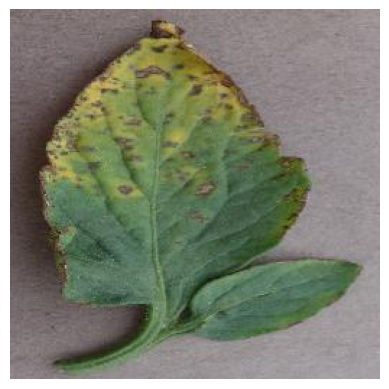

In [51]:
import time
img_path = '/content/drive/MyDrive/Data_100/testing/Tomato_Bacterial_spot/1dbd6b67-25f1-444e-81d8-cbb54213cbb4___GCREC_Bact.Sp 3528.JPG'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0
start_time = time.time()
predictions = model.predict(img_array)
end_time = time.time()
prediction_time = end_time - start_time
predicted_class_idx = np.argmax(predictions, axis=1)[0]
predicted_class_name = class_names[predicted_class_idx]
print(f"Predicted class index: {predicted_class_idx}")
print(f"Predicted class name: {predicted_class_name}")
print(f"Time taken for prediction: {prediction_time:.4f} seconds")
plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.show()


In [43]:
import tensorflow as tf
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [44]:
def returnIndex(labels):
  for i in range(len(labels)):
      if(labels[i]==1):
        return i

1/1 [==============================] - 0s 20ms/step


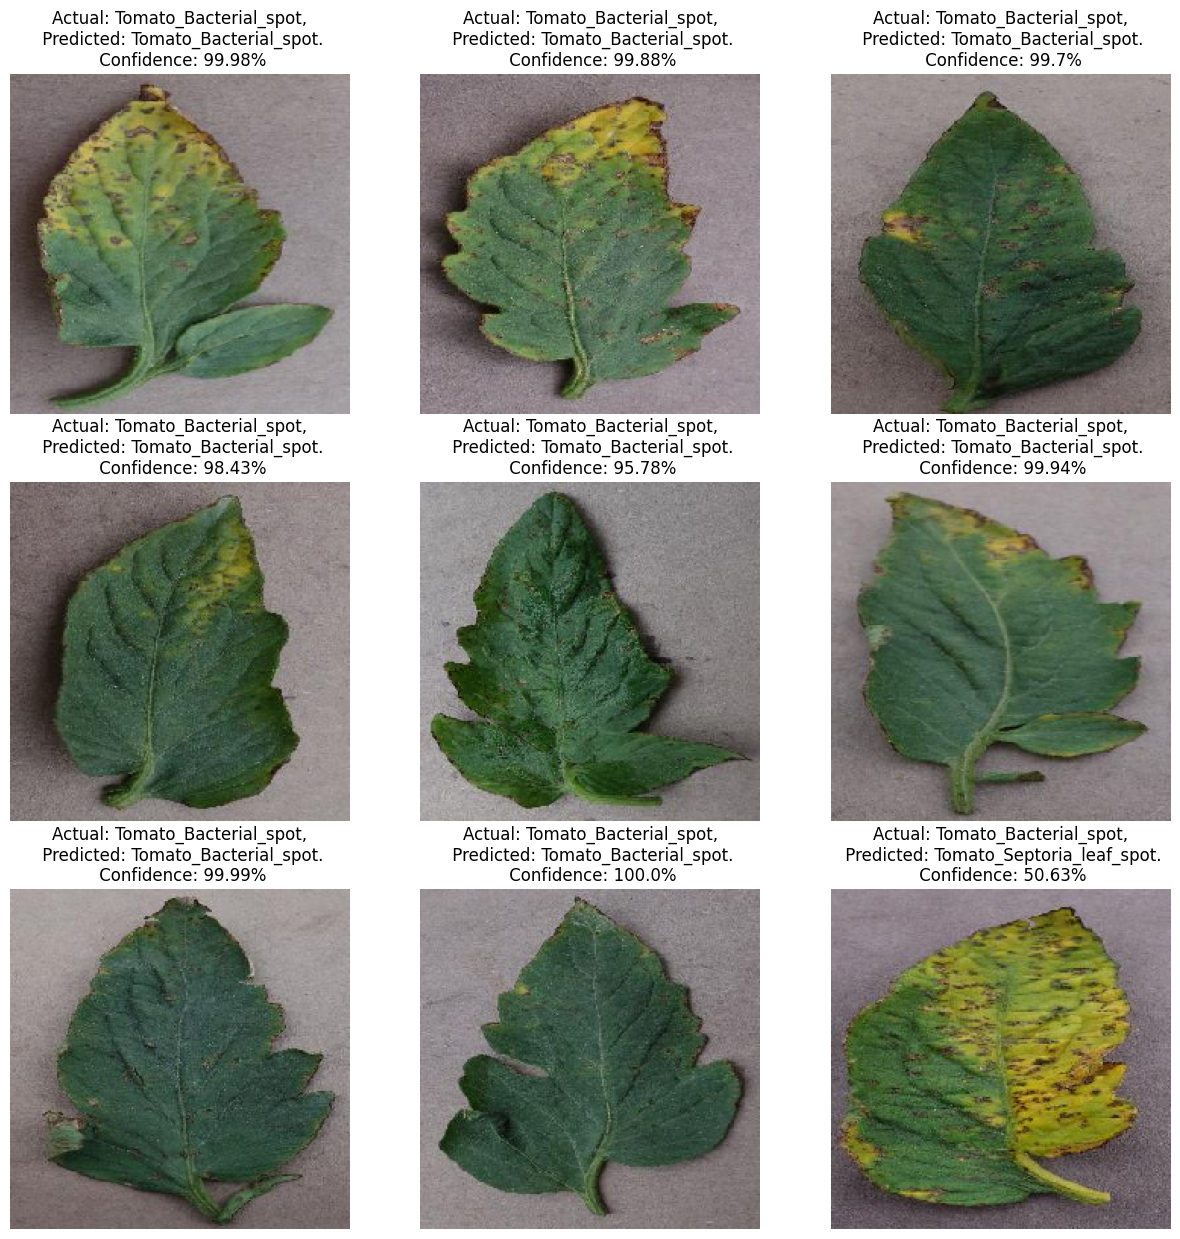

In [45]:
plt.figure(figsize=(15, 15))
for images, labels in test_set:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[returnIndex(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break

4/4 [==============================] - 1s 167ms/step
Confusion Matrix
Normalized confusion matrix
Classification Report
                                             precision    recall  f1-score   support

                      Tomato_Bacterial_spot       0.75      0.90      0.82        10
                        Tomato_Early_blight       1.00      0.62      0.77         8
                         Tomato_Late_blight       0.90      0.75      0.82        12
                           Tomato_Leaf_Mold       0.87      0.81      0.84        16
                  Tomato_Septoria_leaf_spot       0.60      0.82      0.69        11
Tomato_Spider_mites_Two_spotted_spider_mite       0.60      0.86      0.71         7
                        Tomato__Target_Spot       1.00      0.62      0.77         8
      Tomato__Tomato_YellowLeaf__Curl_Virus       1.00      0.90      0.95        10
                Tomato__Tomato_mosaic_virus       0.94      1.00      0.97        15
                             

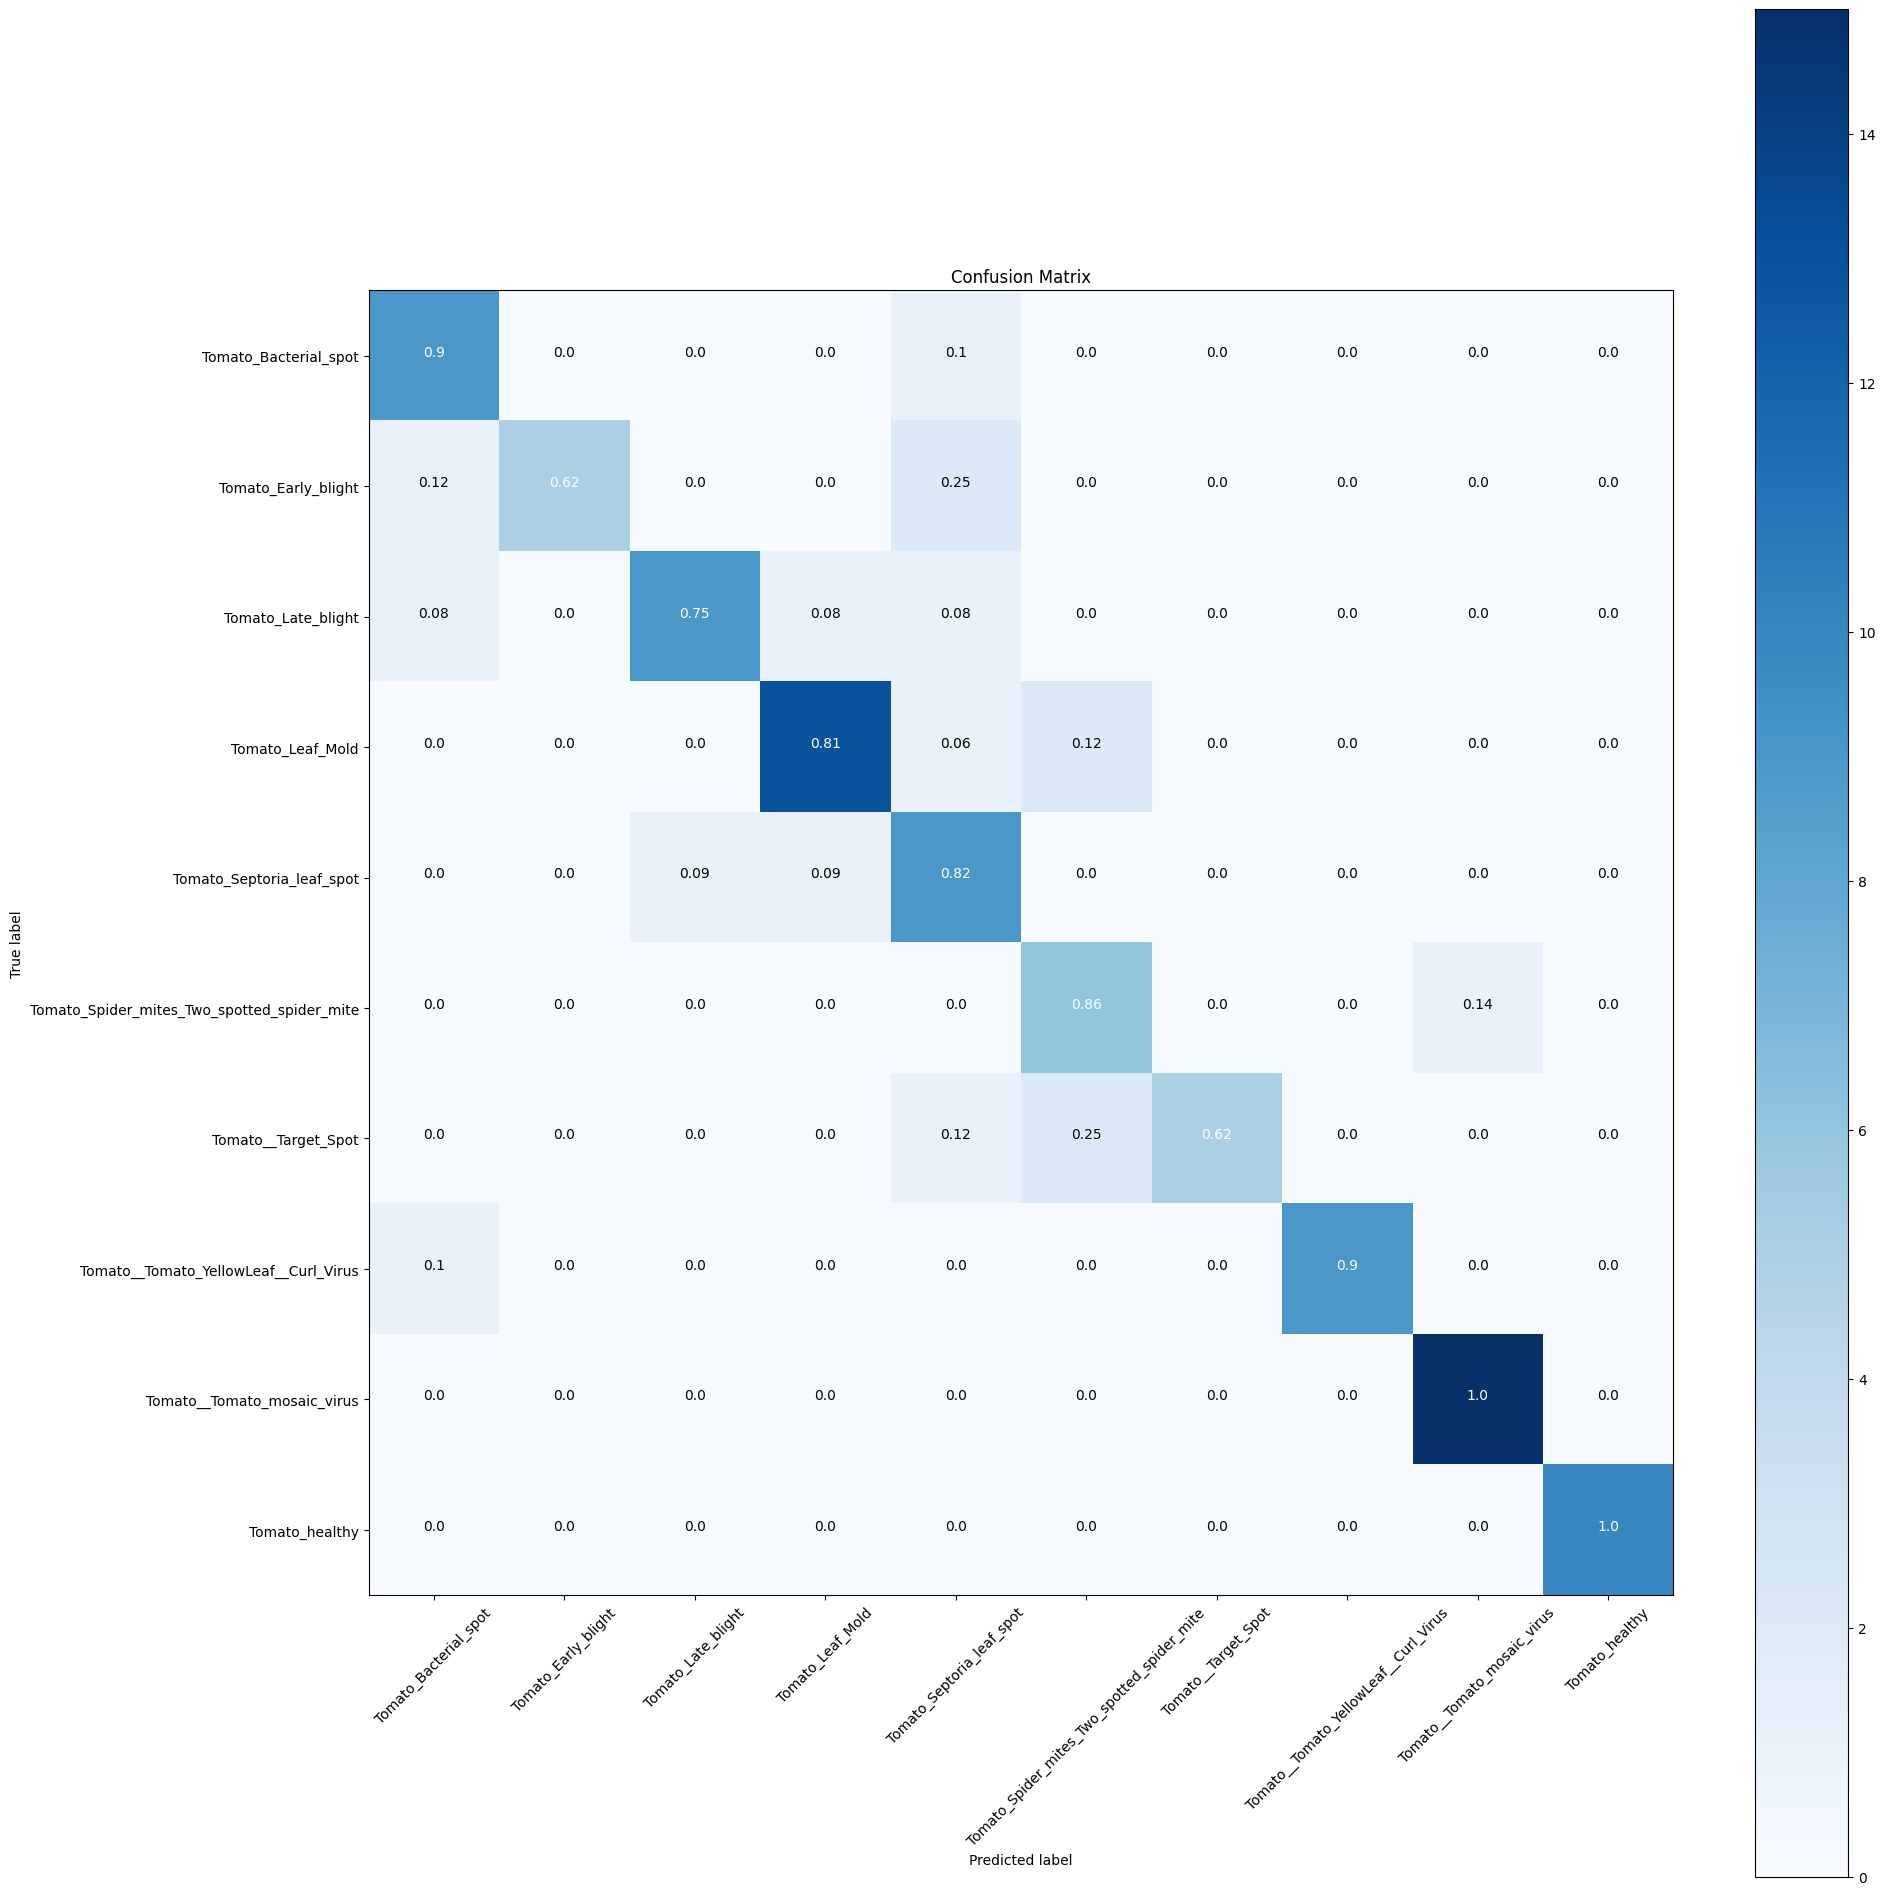

In [46]:
#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools
#shuffle=False
target_names = []
for key in training_set.class_indices:
    target_names.append(key)
# print(target_names)
#Confusion Matrix
Y_pred = model.predict(test_set)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_set.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(test_set.classes, y_pred, target_names=target_names))